In [9]:
import pandas as pd
import numpy as np
import sys, os
import seaborn as sns

from matplotlib import pyplot as plt
sys.path.insert(1, os.path.join(sys.path[0], '../../'))  # for importing local packages from src
sys.path.insert(1, os.path.join(sys.path[0], '../'))  # for importing model config

%reload_ext autoreload
%autoreload 2 

### Datasets

In [2]:
from src.model.rc_dataset import ExperimentDataset


DATASET_NEMA_H0 = '../datasets/dataset_NEMA_NEMA_H0.csv'
DATASET_NEMA_H3 = '../datasets/dataset_NEMA_NEMA_H3.csv'
DATASET_NEMA_H15 = '../datasets/dataset_NEMA_NEMA_H15.csv'

dataset_nema_h0 = ExperimentDataset(csv_path=DATASET_NEMA_H0)
dataset_nema_h3 = ExperimentDataset(csv_path=DATASET_NEMA_H3)
dataset_nema_h15 = ExperimentDataset(csv_path=DATASET_NEMA_H15)

datasets = [
  dataset_nema_h0, 
  dataset_nema_h3,
  dataset_nema_h15
]

## Absorbed I_PAR

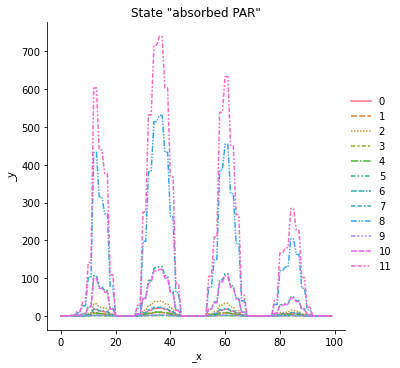

In [23]:
from pipeline_cnwheat import SingleReservoirGenerator


reservoir = SingleReservoirGenerator(state_var='state__PARa')
data = reservoir.transform(datasets)


plot_data = data[0, :100]
sns.relplot(kind='line', data=plot_data)
plt.title('State "absorbed PAR"')
plt.show()

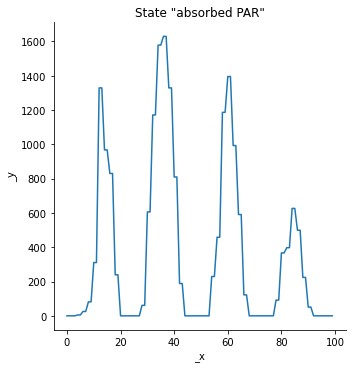

In [22]:
reservoir = SingleReservoirGenerator(state_var='state__PARa')
data = reservoir.transform(datasets)

new_target = np.sum(data, axis=-1)

plot_data = new_target[0, :100]
sns.relplot(kind='line', data=plot_data)
plt.title('State "absorbed PAR"')
plt.show()

In [31]:
from pipeline_base import BaseTargetGenerator
from typing import List

class AbsorbedPARGenerator(BaseTargetGenerator):
    """Transforms a dataset or list of datasets into a single target."""

    def transform(self, datasets: List[ExperimentDataset]) -> np.ndarray:
        reservoir = SingleReservoirGenerator(state_var='state__PARa')
        data = reservoir.transform(datasets)
        data = np.sum(data, axis=-1)
        return data

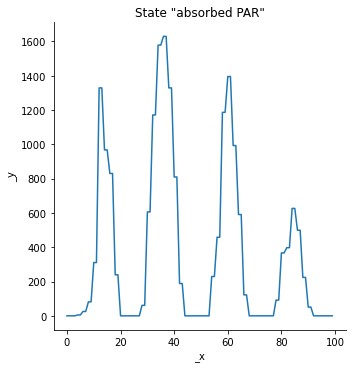

In [34]:
target = AbsorbedPARGenerator()
data = target.transform(datasets)

plot_data = data[0, :100]
sns.relplot(kind='line', data=plot_data)
plt.title('State "absorbed PAR"')
plt.show()